In [1]:
%matplotlib inline

In [9]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

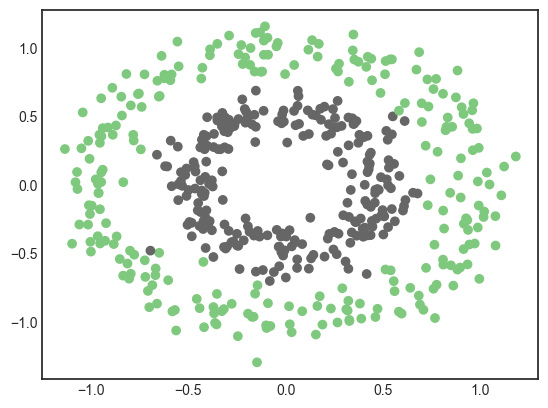

In [10]:
X, Y = make_circles(n_samples=500, shuffle=True, noise=0.1, random_state=1, factor=0.5)
plt.style.use('seaborn-v0_8-white')
plt.scatter(X[:,0], X[:, 1], c=Y, cmap=plt.cm.Accent)
plt.show()

In [11]:
def softmax(z):
    ep_a = np.exp(z)
    sp_a = np.sum(ep_a, axis=1, keepdims=True)
    print(ep_a)
    print(sp_a)
    return ep_a/(sp_a)

In [12]:
import numpy as np
a = np.array([[5, 4, 4]])
softmax(a)

[[148.4131591   54.59815003  54.59815003]]
[[257.60945917]]


array([[0.57611688, 0.21194156, 0.21194156]])

In [20]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, category):
    m = y.shape[0]
    y_oht = np.zeros((m, category))
    y_oht[np.arange(m), y] = 1
    
    return y_oht

In [14]:
X, Y

(array([[ 1.99308036e-01,  5.69022766e-01],
        [-1.56164162e-01,  3.10722009e-01],
        [ 4.22232793e-01,  9.32794601e-01],
        [-2.20814312e-01,  8.79928143e-01],
        [ 5.02358934e-01, -3.63549740e-01],
        [ 4.71811239e-01, -3.15568588e-02],
        [-1.78680022e-02,  5.11511364e-01],
        [ 7.60010510e-01,  6.97067178e-01],
        [ 1.07838053e+00, -2.29676629e-01],
        [-5.92382798e-01,  7.61946067e-01],
        [-1.10730148e-02,  5.41020489e-01],
        [-3.71365374e-01, -8.93024884e-01],
        [-7.44402575e-01,  2.57478335e-01],
        [-1.12242902e-01,  1.05092675e+00],
        [ 1.77926241e-01,  5.53550791e-01],
        [-1.47296029e-01, -1.29610204e+00],
        [-2.44364218e-02, -3.78237950e-01],
        [ 2.68315407e-01,  2.39594280e-01],
        [-1.00097335e+00, -4.88547432e-01],
        [-8.00057547e-01, -4.81367635e-01],
        [ 2.63908011e-01,  4.18628340e-01],
        [ 1.81714722e-01,  4.73298552e-01],
        [ 8.11100864e-03,  3.071

In [15]:
y_oht = one_hot(Y, 3)
print(y_oht)
print(Y)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1

In [18]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        self.input_size = input_size # no of features
        self.layers = layers # no of neurons in 1st and 2nd layer
        self.output_size = output_size
        model = {}
        
        # first layer
        model['w1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        # second layer
        model['w2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        # output layer
        model['w3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))

        self.activation_outputs = 0
        self.model = model
        

    def forward(self, X):
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3 = self.model['b1'], self.model['b2'],  self.model['b3']
        
        z1 = np.dot(X, w1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1, w2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2, w3) + b3
        y_ = softmax(z3)

        self.activation_outputs = (a1, a2, y_)
        return y_
        

    def backward(self, x, y, learning_rate=0.001):
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]
        
        a1, a2, y_ = self.activation_outputs
        
        delta3 = y_ - y 
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
        
        delta2 = (1-np.square(a2)) * np.dot(delta3, w3.T) 
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)/float(m)

        delta1 = (1-np.square(a1)) * np.dot(delta2, w2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)/float(m)

        # update the model parameters using Gradient Descent
        self.model['w1'] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1
        
        self.model['w2'] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2
        
        self.model['w3'] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3


    def predict(self, x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)


    def summary(self):
        w1, w2, w3 = self.model['w1'], self.model['w2'], self.model['w3']
        a1, a2, y_ = self.activation_outputs

        print("w1: ", w1.shape)
        print("a1: ", a1.shape)
        
        print("w2: ", w2.shape)
        print("a2: ", a2.shape)
        
        print("w3: ", w3.shape)
        print("y_: ", y_.shape)     


In [9]:
# model.forward(X)

In [10]:
# a1, a2, y_ = model.activation_outputs

In [11]:
# a1.shape, a2.shape, y_.shape

In [12]:
# model.summary()

In [22]:
def train(X, Y, model, epochs, alpha, logs=True):
    training_loss = []

    classes = len(np.unique(Y))
    y_oht = one_hot(Y, classes)

    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(y_oht, Y_)
        training_loss.append(l)
        model.backward(X, y_oht, alpha)

        if logs:
            print('Epoch %d loss %.4f'%(ix, l))

    return training_loss

2
[[0.74515602 0.66468512]
 [0.85418389 1.63624124]
 [0.80175377 0.58775416]
 [0.77165671 1.70888976]
 [0.61079048 0.35082284]
 [0.63425255 0.45602067]
 [0.67455168 1.01585138]
 [0.59203822 0.46332499]
 [0.69107098 0.53837749]
 [1.80689909 3.29415182]
 [0.68869245 0.99609326]
 [1.22767966 1.65461522]
 [1.57975724 2.27444071]
 [0.85645088 1.32155397]
 [0.73924992 0.68282462]
 [0.93420958 1.17855603]
 [1.55833345 1.09128815]
 [0.65509854 0.57365628]
 [1.86019933 2.28668738]
 [1.72379071 2.17839623]
 [0.69465533 0.59959203]
 [0.71001546 0.67108983]
 [0.63044813 0.96165218]
 [0.62493859 0.39261899]
 [0.88337663 1.12190296]
 [1.56467247 2.06203213]
 [0.60760992 0.47315522]
 [1.53748773 2.57516566]
 [1.14335605 1.57245087]
 [1.21972467 0.4856725 ]
 [1.05416972 1.18517174]
 [0.67527771 0.82252116]
 [0.70109076 0.51500251]
 [1.53596556 0.9433679 ]
 [1.18925312 2.42627727]
 [1.57642368 2.04027553]
 [0.64808021 0.50058743]
 [0.60729504 0.4884405 ]
 [1.51454078 1.90033803]
 [1.42093497 2.34149098

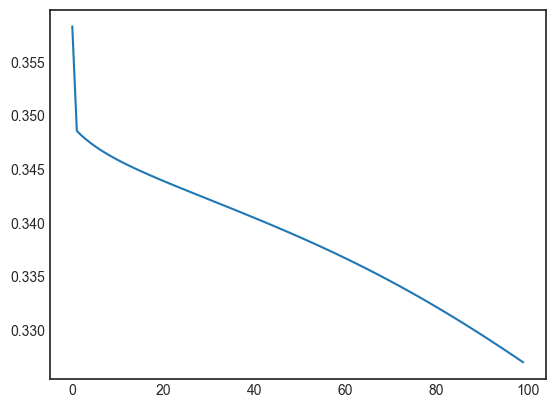

In [23]:
model = NeuralNetwork(input_size=2, layers=[10,5], output_size=2) 
losses = train(X, Y, model, epochs=100, alpha=0.001, logs=False)
plt.plot(losses)
# print(losses)

In [15]:
Ypred = model.predict(X)
np.sum(Ypred == Y)/np.sum(Y.shape[0])

0.642

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
layers = [2, 5, 10, 30, 50, 100]
activation = ['relu', 'logistic', 'tanh', 'identity']
for ac in activation:
    for l in layers:
        mlp = MLPClassifier(hidden_layer_sizes=l, activation=ac)
        mlp.fit(X, Y)
        print(ac, l, mlp.score(X, Y))

relu 2 0.528
relu 5 0.736
relu 10 0.932
relu 30 0.978
relu 50 0.988
relu 100 0.996
logistic 2 0.5
logistic 5 0.5
logistic 10 0.482
logistic 30 0.482
logistic 50 0.536
logistic 100 0.452
tanh 2 0.554
tanh 5 0.734
tanh 10 0.796
tanh 30 0.808
tanh 50 0.968
tanh 100 0.91
identity 2 0.484
identity 5 0.632
identity 10 0.518
identity 30 0.466
identity 50 0.494
identity 100 0.492
